In [89]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import os

In [75]:
#identify all the csv files in folder
file_extension =".csv"

In [ ]:
#NOTE 
#an f" string can pass variables

#for example
value=5
f"This is a cool string {value}"

#So we can create a list comprhension using an f" string

In [77]:
#create a list comprhension for aqi data
aqi_all= [i for i in glob.glob(f"annual*{file_extension}")]
cancer_all= [i for i in glob.glob(f"Lung*{file_extension}")]
#HSPA_all=[i for i in glob.glob(f"HSPA*{file_extension}")]

In [78]:
print(aqi_all)
print(cancer_all)
#print(HSPA_all)
#we can do print(aqi_all [0:2]) to only get a select csv 

['annual_aqi_by_county_2006.csv', 'annual_aqi_by_county_2007.csv', 'annual_aqi_by_county_2008.csv', 'annual_aqi_by_county_2009.csv', 'annual_aqi_by_county_2010.csv', 'annual_aqi_by_county_2011.csv', 'annual_aqi_by_county_2012.csv', 'annual_aqi_by_county_2013.csv', 'annual_aqi_by_county_2014.csv', 'annual_aqi_by_county_2015.csv', 'annual_aqi_by_county_2016.csv']
['Lung_cancer_data_1.csv', 'Lung_cancer_data_2.csv', 'Lung_cancer_data_3.csv', 'Lung_cancer_data_4.csv']


In [113]:
#write a loop that will call all the aqi csv and then concat them
aqi_data=pd.concat([pd.read_csv(file,delimiter=',', encoding='UTF-8') for file in aqi_all])
#only keep the state of California
df1= aqi_data.loc[aqi_data.State == 'California']


In [94]:
#write a loop that will call all the SEER csv and then concat them
df2= pd.concat([pd.read_csv(file,delimiter=',', encoding='UTF-8') for file in cancer_all])

In [104]:
#df3=pd.read_csv('hspa.csv')

In [114]:
df1.shape

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
62,California,Alameda,2006,365,220,123,17,5,0,0,190,84,45,0,25,155,0,185,0
63,California,Amador,2006,364,265,69,27,3,0,0,185,97,37,0,0,364,0,0,0
64,California,Butte,2006,365,155,142,59,9,0,0,172,122,56,0,1,262,0,100,2
65,California,Calaveras,2006,364,230,88,34,11,1,0,201,108,42,0,0,347,0,17,0
66,California,Colusa,2006,365,234,128,2,1,0,0,154,74,45,0,0,216,0,145,4


In [115]:
df1.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
62,California,Alameda,2006,365,220,123,17,5,0,0,190,84,45,0,25,155,0,185,0
63,California,Amador,2006,364,265,69,27,3,0,0,185,97,37,0,0,364,0,0,0
64,California,Butte,2006,365,155,142,59,9,0,0,172,122,56,0,1,262,0,100,2
65,California,Calaveras,2006,364,230,88,34,11,1,0,201,108,42,0,0,347,0,17,0
66,California,Colusa,2006,365,234,128,2,1,0,0,154,74,45,0,0,216,0,145,4


In [133]:
#What are the max days with AQI
df1['Days with AQI'].min()

7

In [135]:
#What are min days with AQI
df1['Days with AQI'].max()

366

In [116]:
df1.describe()

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,2011.025467,347.694397,201.899830,112.582343,25.049236,7.196944,0.633277,0.332767,312.964346,88.142615,48.460102,0.113752,10.444822,218.208829,0.246180,104.998302,13.682513
std,3.163519,62.621569,92.637828,63.770652,29.390509,14.194420,2.257560,1.830755,1085.186832,34.343206,17.296745,0.752974,19.036014,98.593798,2.919936,73.937106,46.218566
min,2006.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,21.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,365.000000,127.000000,66.000000,2.000000,0.000000,0.000000,0.000000,120.000000,63.000000,38.000000,0.000000,0.000000,172.000000,0.000000,32.000000,0.000000
50%,2011.000000,365.000000,215.000000,113.000000,13.000000,1.000000,0.000000,0.000000,155.000000,84.000000,45.000000,0.000000,1.000000,223.000000,0.000000,115.000000,1.000000
75%,2014.000000,365.000000,272.000000,162.000000,37.000000,6.000000,0.000000,0.000000,190.000000,105.000000,54.000000,0.000000,14.000000,286.000000,0.000000,155.000000,6.000000
max,2016.000000,366.000000,359.000000,275.000000,122.000000,74.000000,25.000000,24.000000,14043.000000,190.000000,107.000000,8.000000,124.000000,366.000000,64.000000,355.000000,354.000000


In [128]:
#Checking to make sure CA values remain untouched.
df1['County'].nunique()

#there are only 54 counties in our AQI dataset. California has 58 counties so 4 must not be included in the dataset. 

54

In [149]:
#And now I want to check to make sure all the years are in there...
df1['Year'].value_counts()

2016    54
2015    54
2014    54
2013    54
2012    54
2011    54
2010    53
2009    53
2008    53
2007    53
2006    53
Name: Year, dtype: int64

In [117]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 62 to 102
Data columns (total 19 columns):
State                                  589 non-null object
County                                 589 non-null object
Year                                   589 non-null int64
Days with AQI                          589 non-null int64
Good Days                              589 non-null int64
Moderate Days                          589 non-null int64
Unhealthy for Sensitive Groups Days    589 non-null int64
Unhealthy Days                         589 non-null int64
Very Unhealthy Days                    589 non-null int64
Hazardous Days                         589 non-null int64
Max AQI                                589 non-null int64
90th Percentile AQI                    589 non-null int64
Median AQI                             589 non-null int64
Days CO                                589 non-null int64
Days NO2                               589 non-null int64
Days Ozone            

In [142]:
pd.options.mode.chained_assignment = None  # default='warn'
#Adding new columns for % and using the rounding function to limit to 2 decimal places

df1['% Good Days'] = round((df1['Good Days']/df1['Days with AQI'])*100,2)
df1['% Moderate Days'] = round((df1['Moderate Days']/df1['Days with AQI'])*100,2)
df1['% Unhealthy for Sensitive Groups Days'] = round((df1['Unhealthy for Sensitive Groups Days']/df1['Days with AQI'])*100,2)
df1['% Unhealthy Days'] = round((df1['Unhealthy Days']/df1['Days with AQI'])*100,2)
df1['% Very Unhealthy Days'] = round((df1['Very Unhealthy Days']/df1['Days with AQI'])*100,2)
df1['% Hazardous Days'] = round((df1['Hazardous Days']/df1['Days with AQI'])*100,2)
df1['% PM2.5 Days'] = round ((df1['Days PM2.5']/df1['Days with AQI'])*100,2)

#Just going to check the tail on this
df1.tail(10)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days SO2,Days PM2.5,Days PM10,% Good Days,% Moderate Days,% Unhealthy for Sensitive Groups Days,% Unhealthy Days,% Very Unhealthy Days,% Hazardous Days,% PM2.5 Days
93,California,Solano,2016,366,278,86,2,0,0,0,...,0,155,0,75.96,23.50,0.55,0.00,0.0,0.0,42.35
94,California,Sonoma,2016,366,348,18,0,0,0,0,...,0,64,4,95.08,4.92,0.00,0.00,0.0,0.0,17.49
95,California,Stanislaus,2016,366,147,176,40,3,0,0,...,0,159,4,40.16,48.09,10.93,0.82,0.0,0.0,43.44
96,California,Sutter,2016,366,166,168,32,0,0,0,...,0,162,0,45.36,45.90,8.74,0.00,0.0,0.0,44.26
97,California,Tehama,2016,366,226,98,37,5,0,0,...,0,40,1,61.75,26.78,10.11,1.37,0.0,0.0,10.93
98,California,Trinity,2016,167,116,51,0,0,0,0,...,0,167,0,69.46,30.54,0.00,0.00,0.0,0.0,100.00
99,California,Tulare,2016,366,80,162,102,22,0,0,...,0,137,7,21.86,44.26,27.87,6.01,0.0,0.0,37.43
100,California,Tuolumne,2016,354,223,86,38,7,0,0,...,0,0,0,62.99,24.29,10.73,1.98,0.0,0.0,0.00
101,California,Ventura,2016,366,173,184,9,0,0,0,...,0,127,7,47.27,50.27,2.46,0.00,0.0,0.0,34.70
102,California,Yolo,2016,366,293,69,4,0,0,0,...,0,83,1,80.05,18.85,1.09,0.00,0.0,0.0,22.68


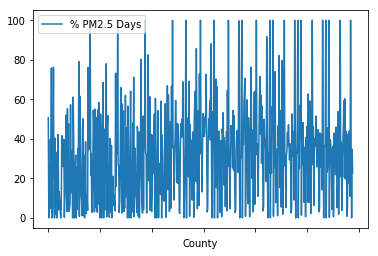

In [146]:
#What follows are some very bad visualization choices for this data
#This just to give us an idea of how much percent of the time this data is reflected in AQI
#We checked this in an earlier notebook and found that the results were accurate 

#Plotting PM2.5 - considered main pollutant 
df1.plot(x= "County", y = "% PM2.5 Days")

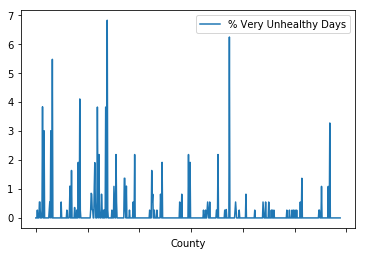

In [147]:
df1.plot(x = "County", y = "% Very Unhealthy Days")

In [108]:
df2.shape

(188506, 9)

In [111]:
df2.head()

,Age recode with <1 year olds,Sex,Year of diagnosis,"Race recode (White, Black, Other)",Histologic Type ICD-O-3,"ICD-O-3 Hist/behav, malignant",Laterality,Sequence number,State-county
0,16,2,206,1,250,1003,2,2,6013
1,16,1,206,1,70,283,2,2,6001
2,15,2,207,1,46,187,1,2,6013
3,16,2,211,1,10,43,2,3,6075
4,16,2,209,1,140,563,1,2,6075


In [130]:
df2['State-county'].nunique()
#we have 58 counties in this dataset.

58

In [148]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188506 entries, 0 to 111988
Data columns (total 9 columns):
Age recode with <1 year olds         188506 non-null int64
Sex                                  188506 non-null int64
Year of diagnosis                    188506 non-null int64
Race recode (White, Black, Other)    188506 non-null int64
Histologic Type ICD-O-3              188506 non-null int64
ICD-O-3 Hist/behav, malignant        188506 non-null int64
Laterality                           188506 non-null int64
Sequence number                      188506 non-null int64
State-county                         188506 non-null int64
dtypes: int64(9)
memory usage: 14.4 MB


In [151]:
#And now I want to check to make sure all the years are in there...
df2['Year of diagnosis'].value_counts()
#The years from SEER were downlaoded like this. Don't know how that happened. I will check again otherwise we can create a new column wit the correct values.


209    18042
206    17598
207    17446
208    17321
210    17298
215    17138
214    17062
212    16891
213    16833
211    16698
216    16179
Name: Year of diagnosis, dtype: int64